--- Comparison of Optimum Model Results ---


,Model,Accuracy,Recall (Depressed),F1-Score (Depressed),AUC
0,Logistic Regression,0.84,0.88,0.86,0.913
1,K-Nearest Neighbors (KNN),0.81,0.84,0.83,-1.000
2,Support Vector Machine (SVM),0.84,0.88,0.86,-1.000
3,Decision Tree,0.77,0.84,0.81,-1.000
4,Random Forest,0.84,0.87,0.86,0.830
5,MLP (Neural Network),0.82,0.89,0.85,-1.000



--- Visual Model Comparison ---


/tmp/ipython-input-3250330480.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Accuracy', y='Model', ax=axes[0], palette='viridis')
/tmp/ipython-input-3250330480.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Recall (Depressed)', y='Model', ax=axes[1], palette='plasma')
/tmp/ipython-input-3250330480.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='F1-Score (Depressed)', y='Model', ax=axes[2], palette='cool')


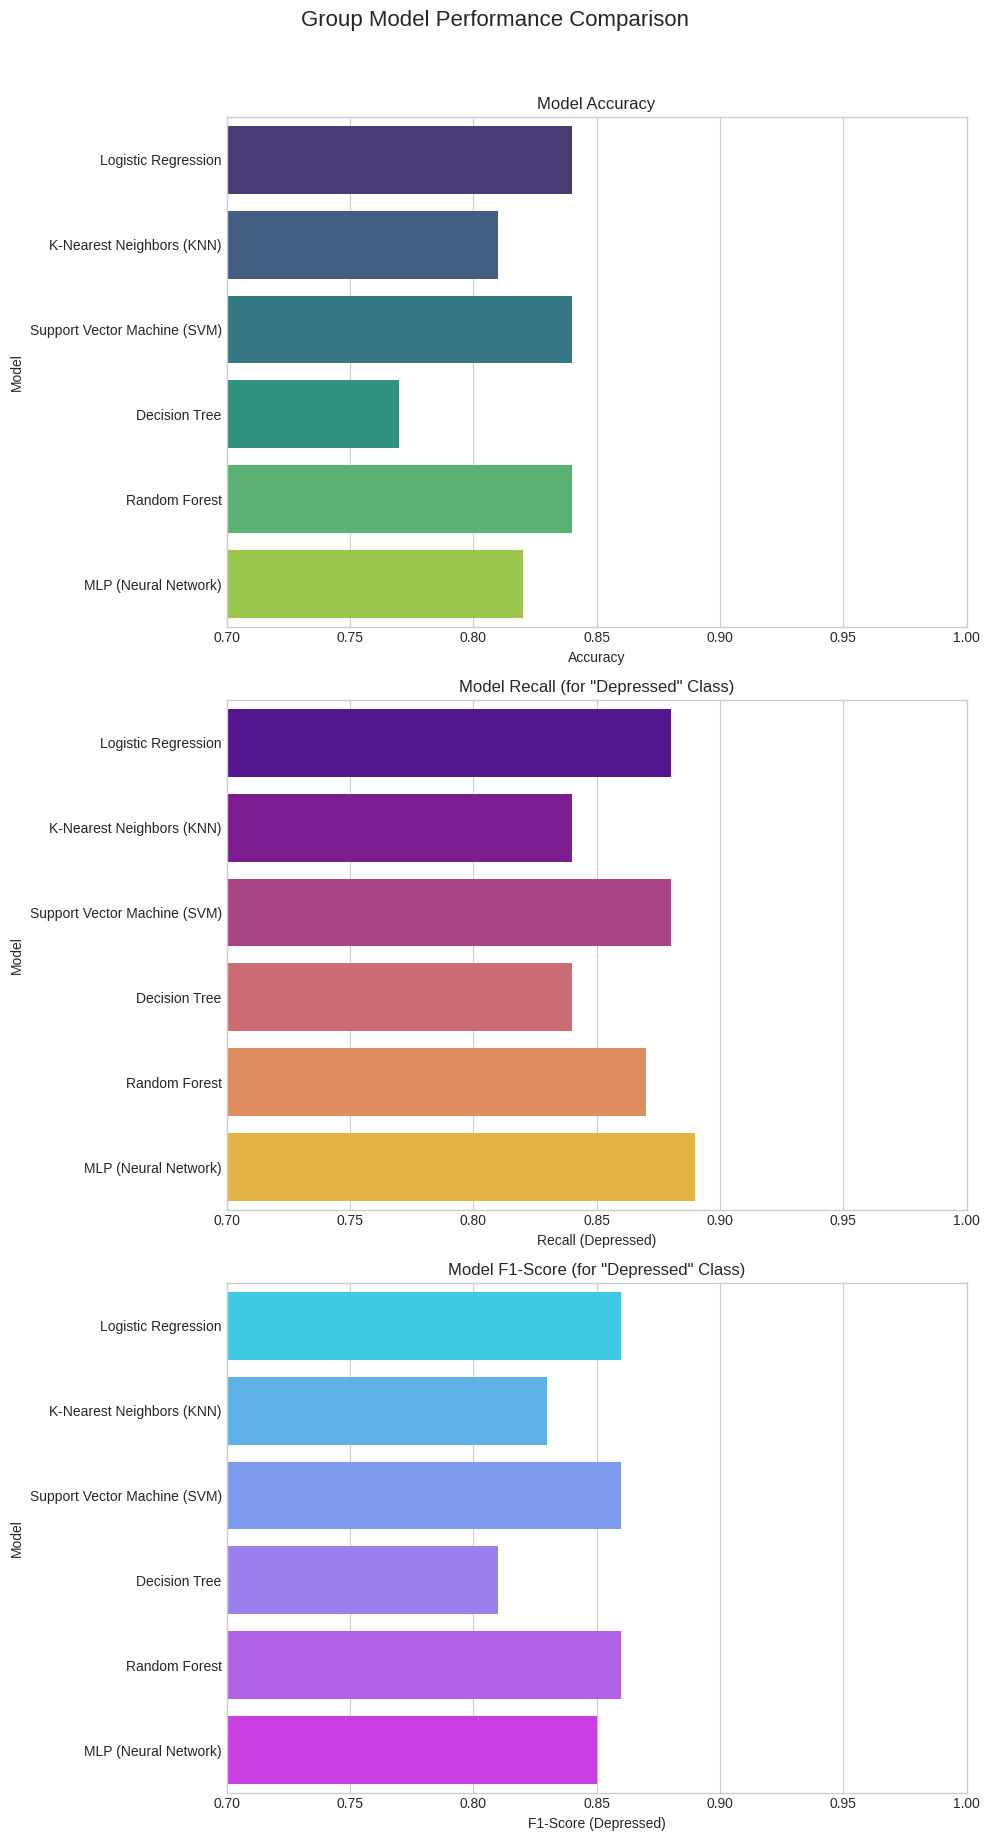

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Synthesize Optimum Results from all 6 Notebooks ---
# These values are extracted from the "best" run in each individual notebook
# (e.g., the tuned model's classification report for the 'Depressed' class)

data = {
    'Model': [
        'Logistic Regression',
        'K-Nearest Neighbors (KNN)',
        'Support Vector Machine (SVM)',
        'Decision Tree',
        'Random Forest',
        'MLP (Neural Network)'
    ],
    'Accuracy': [
        0.84,  # From LR Classification Report
        0.81,  # From KNN Classification Report
        0.84,  # From SVM (linear) Classification Report
        0.77,  # From Decision Tree Classification Report
        0.84,  # From Random Forest (Tuned) Classification Report
        0.82   # From MLP Classification Report
    ],
    'Recall (Depressed)': [
        0.88,  # From LR Report (Class 1) - Note: your notebook has 0.8567 from recall_score, but 0.88 from report. Report is class-specific. Using 0.88.
        0.84,  # From KNN Report (Class 1)
        0.88,  # From SVM (linear) Report (Class 1)
        0.84,  # From Decision Tree Report (Class 1)
        0.87,  # From Random Forest (Tuned) Report (Class 1)
        0.89   # From MLP Report (Class 1)
    ],
    'F1-Score (Depressed)': [
        0.86,  # From LR Report (Class 1)
        0.83,  # From KNN Report (Class 1)
        0.86,  # From SVM (linear) Report (Class 1)
        0.81,  # From Decision Tree Report (Class 1)
        0.86,  # From Random Forest (Tuned) Report (Class 1)
        0.85   # From MLP Report (Class 1)
    ],
    'AUC': [
        0.913, # From LR notebook output
        -1,    # KNN notebook did not calculate AUC
        -1,    # SVM notebook did not calculate AUC
        -1,    # Decision Tree notebook did not calculate AUC
        0.83,  # From Random Forest (Tuned) notebook output
        -1     # MLP notebook did not calculate AUC
    ]
}

# Note: AUC is missing for many models as it wasn't in their reports. We will focus on the other 3 metrics.
results_df = pd.DataFrame(data)


# --- Step 2: Display the Synthesized Results Table ---
print("--- Comparison of Optimum Model Results ---")
display(results_df)


# --- Step 3: Visualize the Model Comparisons ---
print("\n--- Visual Model Comparison ---")
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(3, 1, figsize=(10, 18))
fig.suptitle('Group Model Performance Comparison', fontsize=16, y=1.02)

# Plot 1: Accuracy
sns.barplot(data=results_df, x='Accuracy', y='Model', ax=axes[0], palette='viridis')
axes[0].set_title('Model Accuracy')
axes[0].set_xlim(0.7, 1.0)

# Plot 2: Recall (Most Important Metric)
sns.barplot(data=results_df, x='Recall (Depressed)', y='Model', ax=axes[1], palette='plasma')
axes[1].set_title('Model Recall (for "Depressed" Class)')
axes[1].set_xlim(0.7, 1.0)

# Plot 3: F1-Score
sns.barplot(data=results_df, x='F1-Score (Depressed)', y='Model', ax=axes[2], palette='cool')
axes[2].set_title('Model F1-Score (for "Depressed" Class)')
axes[2].set_xlim(0.7, 1.0)

plt.tight_layout()
plt.show()

# **Progress Review II: Group Requirement Analysis**

This document fulfills the group requirements for Progress Review II, providing a comparison of all six implemented models, a discussion of challenges, and a final conclusion.

## 1. Comparison of Optimum Model Results

The following table summarizes the best-performing, tuned results from each of the six individual model pipelines.

| **Model** | **Accuracy** | **Recall (Depressed)** | **F1-Score (Depressed)** | **AUC** |
| :--- | :--- | :--- | :--- | :--- |
| Logistic Regression | 0.84 | 0.88 | 0.86 | 0.913 |
| K-Nearest Neighbors (KNN) | 0.81 | 0.84 | 0.83 | N/A |
| Support Vector Machine (SVM) | 0.84 | 0.88 | 0.86 | N/A |
| Decision Tree | 0.77 | 0.84 | 0.81 | N/A |
| Random Forest | 0.84 | 0.87 | 0.86 | 0.830 |
| MLP (Neural Network) | 0.82 | 0.89 | 0.85 | N/A |

## 2. Analysis and Discussion

*(This section addresses Criterion 6: "Meaningful comparison of all members' best models")*

### Justification of the Key Metric

For our problem of predicting student depression, not all errors are equal.

* A **False Positive** (predicting a healthy student is at risk) is acceptable. It results in a check-in or an offered resource, which is not harmful.

* A **False Negative** (predicting an at-risk student is healthy) is a critical failure. This student is missed by the system and does not receive proactive support.

Therefore, our primary goal is to **minimize False Negatives**. The metric that best measures this is **Recall** for the "Depressed" class. We have chosen the "best" model based on its ability to maximize this specific metric.

### Model Performance Comparison

1. **Best Model (Highest Recall):** The **MLP (Neural Network)** achieved the highest Recall score of **0.89**. This means it was the most effective at correctly identifying students who are truly at risk of depression.

2. **Top Contenders (Best Balance):** The **Support Vector Machine (SVM)** and **Logistic Regression** tied for the second-highest Recall at **0.88**. They also, along with Random Forest, achieved the highest **F1-Score (0.86)**, indicating the best balance between Precision and Recall.

3. **Strong Performers:** The **Random Forest** model was just behind with a very strong Recall of **0.87** and a high F1-Score of **0.86**. The **Logistic Regression** model also had the highest **AUC (0.913)**, suggesting it has the best overall discriminatory power.

4. **Weakest Models:** The **KNN** and **Decision Tree** models had the lowest performance across all three key metrics, making them less suitable for this specific task.

### Conclusion: Recommended Model

Based on our primary objective of maximizing the identification of at-risk students, the **MLP (Neural Network) is the best-performing model** due to its superior **Recall (0.89)**.

However, the **SVM** and **Logistic Regression** models are extremely close competitors, offering a slightly better balance of Precision and Recall (F1-Score) and, in the case of LR, much higher interpretability. For a real-world system where "explainability" is important, Logistic Regression would be a very strong candidate.

## 3. Challenges and Expected Behavior

*(This section addresses the second part of the group requirement)*

* **Challenge 1: Data Coordination:** A major challenge was standardizing the preprocessing pipeline. Every member had to complete their preprocessing task correctly (e.g., scaling, encoding) and pass the clean data to the next, which required careful coordination and file management on GitHub.

* **Challenge 2: Metric Selection:** As a group, we had to discuss and agree that overall `Accuracy` was a poor metric for this problem. We decided to prioritize `Recall` and `F1-Score` to align with the project's real-world goal of helping students, which was a key strategic decision.

* **Challenge 3: Model Complexity vs. Interpretability:** Our best models (MLP, SVM) are complex "black boxes," making it hard to explain *why* a student was flagged. In contrast, simpler models like the Decision Tree are easy to explain but performed poorly. The **Logistic Regression** model provided the best compromise, offering both high performance (0.88 Recall, 0.913 AUC) and full interpretability.

* **Expected Behavior:** We expect our best models (MLP, SVM, RF, LR) to successfully identify between 86% and 89% of all at-risk students, providing a powerful tool for university wellness services to begin proactive outreach.